# Dogs vs Cats Image Classifier

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [2]:
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print('Found a GPU with name:', gpu)
else:
    print('Failed to detect a GPU.')

Found a GPU with name: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
# Generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


2024-01-24 15:43:44.806704: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-01-24 15:43:44.806730: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-01-24 15:43:44.806739: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-01-24 15:43:44.806774: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-24 15:43:44.806790: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
# Normalize

def process(image,label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [5]:
# Create CNN Model :

model = Sequential()

model.add(Conv2D(8,kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(16,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 8)       224       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 8)       32        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      1168      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 16)      64        
 chNormalization)                                                
                                                        

In [7]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_ds, epochs=10, validation_data = test_ds)

Epoch 1/10


2024-01-24 15:43:45.667307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 31s 44ms/step - loss: 2.1721 - accuracy: 0.5880 - val_loss: 3.1501 - val_accuracy: 0.5944
Epoch 2/10
625/625 [==============================] - 28s 44ms/step - loss: 2.9162 - accuracy: 0.6039 - val_loss: 1.9981 - val_accuracy: 0.5696
Epoch 3/10
625/625 [==============================] - 28s 44ms/step - loss: 5.5621 - accuracy: 0.6054 - val_loss: 8.4469 - val_accuracy: 0.6126
Epoch 4/10
625/625 [==============================] - 28s 44ms/step - loss: 7.4188 - accuracy: 0.6420 - val_loss: 9.3755 - val_accuracy: 0.6682
Epoch 5/10
625/625 [==============================] - 28s 44ms/step - loss: 12.0503 - accuracy: 0.6668 - val_loss: 10.0882 - val_accuracy: 0.7094
Epoch 6/10
625/625 [==============================] - 28s 44ms/step - loss: 14.4622 - accuracy: 0.6552 - val_loss: 16.6004 - val_accuracy: 0.6958
Epoch 7/10
625/625 [==============================] - 28s 44ms/step - loss: 22.5317 - accuracy: 0.6504 - val_loss: 128.4924 - val_accuracy: 0.4

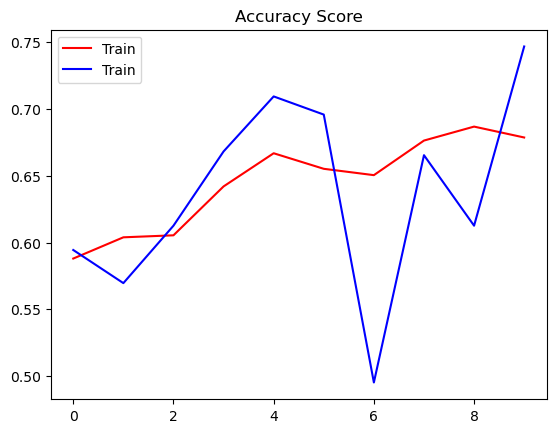

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='Train')
plt.plot(history.history['val_accuracy'], color='blue', label='Train')
plt.title('Accuracy Score')
plt.legend()
plt.show()

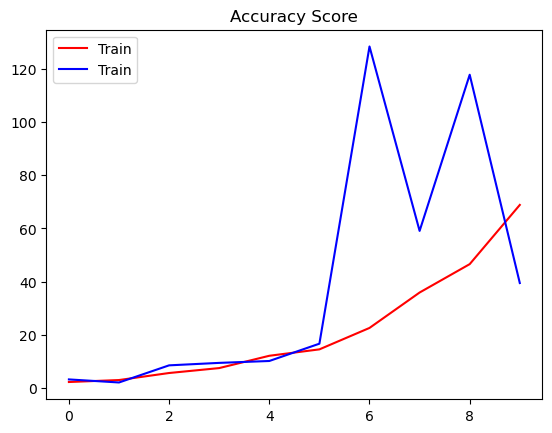

In [10]:
plt.plot(history.history['loss'], color='red', label='Train')
plt.plot(history.history['val_loss'], color='blue', label='Train')
plt.title('Accuracy Score')
plt.legend()
plt.show()